In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('joined_dataset.csv').sample(10000)

/Users/kellymarshall/opt/anaconda3/envs/big_data_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,14,15,16,17,18,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [248]:
before=df[df['year']==2019].copy()
after= df[df['year']==2020]
eighteen=df[df['year']==2018]
now=others[others['year']==2021]

## Assesing foreign vs. domestic corporations

In [131]:
def foreign_domestic(data):
    data['is_domestic']=data['Entity Type'].map(lambda x: 'Domestic' if 'DOMESTIC' in x else 'Foreign')
    frequencies=data.groupby('is_domestic').size()
    plt.bar(list(frequencies.index),list(frequencies))
    plt.title('Foreign And Domestic Corporations')
    plt.ylabel('Number of Active Corporations')
    #plt.show()

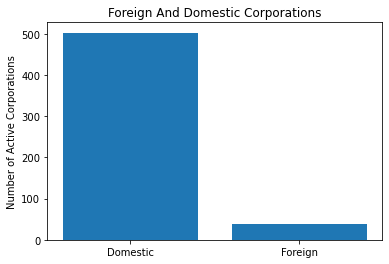

In [138]:
foreign_domestic(after)

## NYC vs. Everywhere else

In [139]:
df['is_NYC']

2665094     False
15640814    False
8067842     False
13960851     True
12374244    False
            ...  
12186496    False
14069817    False
13898360     True
13753943    False
2177079      True
Name: is_NYC, Length: 10000, dtype: bool

In [140]:
loc_freqs=df.groupby('is_NYC').size()
loc_freqs

is_NYC
False    7204
True     2796
dtype: int64

In [141]:
def nyc_else(data):
    nyc=['richmond','new york','richmond','queens','bronx']
    df['is_NYC']=df['County'].map(lambda x:x in nyc)
    loc_freqs=df[['is_NYC',''].groupby('is_NYC').size()
    print(loc_freqs)
    loc_freqs.plot.bar()
    plt.title('Inside and Outside New York')
    plt.ylabel('Number of Active Corporations')

is_NYC
False    7204
True     2796
dtype: int64


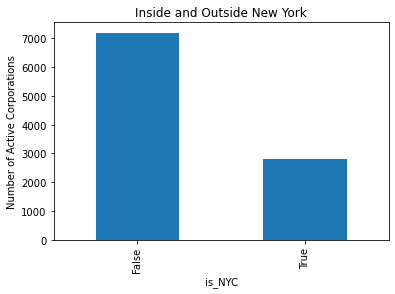

In [142]:
nyc_else(before)

In [143]:
after['DOS ID'].unique().size

541

## Overall businesses

<AxesSubplot:xlabel='month'>

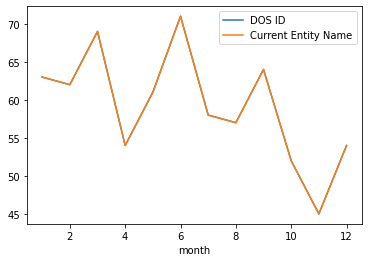

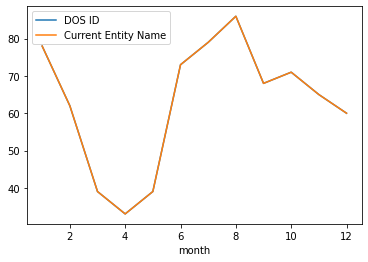

In [153]:
before[['month','DOS ID','Current Entity Name']].groupby('month').nunique().plot()
after[['month','DOS ID','Current Entity Name']].groupby('month').nunique().plot()

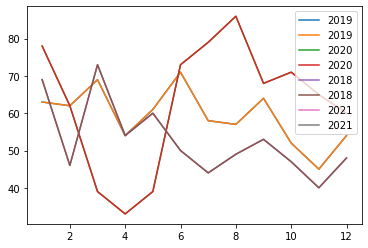

In [165]:
plt.plot(before[['month','DOS ID','Current Entity Name']].groupby('month').nunique().pct_change(),label=2019)
plt.plot(after[['month','DOS ID','Current Entity Name']].groupby('month').nunique().pct_change(), label=2020)
plt.plot(eighteen[['month','DOS ID','Current Entity Name']].groupby('month').nunique().pct_change(), label=2018)
#plt.plot(now[['month','DOS ID','Current Entity Name']].groupby('month').nunique(), label=2021)
plt.legend()
plt.show()

In [168]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

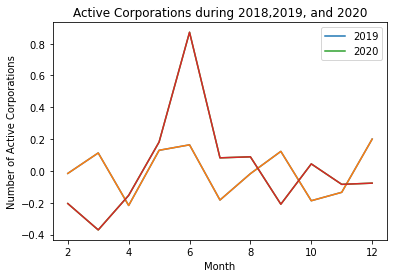

In [286]:
fig, ax = plt.subplots()
ax.plot(before[['month','DOS ID','Current Entity Name']].groupby('month').nunique().pct_change().dropna(),label=2019)
ax.plot(after[['month','DOS ID','Current Entity Name']].groupby('month').nunique().pct_change(), label=2020)
#ax.plot(eighteen[['month','DOS ID','Current Entity Name']].groupby('month').nunique().pct_change(), label=2018)
ax.legend()
ax.set_title('Active Corporations during 2018,2019, and 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Active Corporations')
legend_without_duplicate_labels(ax)

In [263]:
before.groupby('DOS ')
#before[['month','DOS ID','County']].groupby(['County']).nunique().sort_values('month')

In [287]:
before_output=before[['month','DOS ID','County']].groupby(['County','month']).nunique().pct_change().dropna()
after_output=after[['month','DOS ID','County']].groupby(['County','month']).nunique().pct_change().dropna()
before_output.to_csv('2019.csv')
after_output.to_csv('2020.csv')

## Group by County

In [265]:
before[['County','Current Entity Name','Month']].groupby(['County','Month']).nunique()

Current Entity Name
County      Month                     
albany      1                        4
            2                        6
            3                        5
            4                        3
            5                        6
...                                ...
westchester 9                        6
            10                       4
            11                       4
            12                       5
yates       7                        1

[174 rows x 1 columns]

## Towns vs. Cities

In [199]:
def change(x):
    if x=='bronx, kings, new york, queens, and richmond':
        return 'new york'
    else:
        return x

counties=pd.read_csv(r'counties.csv')
towns=pd.read_csv(r'towns.csv')
towns['Area']=towns['Town'].apply(lambda x: x.lower())

cities=pd.read_csv(r'cities.csv')
cities['Area']=cities['City'].apply(lambda x: x.lower())
cities['County']=cities['County'].apply(lambda x:x.lower())#change to name of new york

In [205]:
df['Area']

2665094                            Mamaroneck Town
15640814    Orange-Rockland-Westchester Metro Area
8067842                            Haverstraw Town
13960851                             New York City
12374244                          Irondequoit Town
                             ...                  
12186496                               Lindenhurst
14069817                             Newburgh Town
13898360                             New York City
13753943                              Kings County
2177079                              New York City
Name: Area, Length: 10000, dtype: object

In [203]:
df['is_city']=df['County'].apply(lambda x: x in cities['Area'])
df[['is_city','County']].head(50)

,is_city,County
2665094,False,westchester
15640814,False,warren
8067842,False,rockland
13960851,False,new york
12374244,False,monroe
4341495,False,westchester
14701508,False,erie
13462210,False,bronx
15043636,False,albany
5159250,False,new york


In [233]:
group=df.groupby(['Year','Month'],sort=True).nunique()

In [234]:
group

Unnamed: 0  DOS ID  Current Entity Name  Initial DOS Filing Date  \
Year Month                                                                     
1977 2               2       2                    2                        2   
     5               1       1                    1                        1   
     6               2       2                    2                        2   
     7               1       1                    1                        1   
     8               1       1                    1                        1   
...                ...     ...                  ...                      ...   
2020 10             71      71                   71                       20   
     11             65      65                   65                       19   
     12             60      60                   60                       21   
2021 1              79      79                   79                       19   
     2              65      65                   65                       19   

            County  Jurisdiction  Entity Type  DOS Process Name  \
Year Month                                                        
1977 2           1             1            1                 2   
     5           1             1            1                 1   
     6           1             1            2                 1   
     7           1             1            1                 1   
     8           1             1            1                 1   
...            ...           ...          ...               ...   
2020 10         17             3            5                63   
     11         15             3            7                65   
     12         13             3            6                58   
2021 1          15             2            5                73   
     2          13             2            3                55   

            DOS Process Address 1  DOS Process Address 2  ...  month  day  \
Year Month                                                ...               
1977 2                          2                      0  ...      1    2   
     5                          1                      0  ...      1    1   
     6                          1                      0  ...      1    2   
     7                          1                      0  ...      1    1   
     8                          1                      0  ...      1    1   
...                           ...                    ...  ...    ...  ...   
2020 10                        63                     15  ...      1   20   
     11                        63                     15  ...      1   19   
     12                        58                     13  ...      1   21   
2021 1                         71                     11  ...      1   19   
     2                         60                     10  ...      1   19   

            year  Area  Labor Force  Employed  Unemployed  \
Year Month                                                  
1977 2         1     1            1         1           1   
     5         1     1            1         1           1   
     6         1     2            2         2           2   
     7         1     1            1         1           1   
     8         1     1            1         1           1   
...          ...   ...          ...       ...         ...   
2020 10        1    46           43        45          36   
     11        1    44           40        42          36   
     12        1    41           38        40          34   
2021 1         1    49           45        44          40   
     2         1    44           41        41          32   

            Unemployment Rate                                                                                                                                                                        \
Year Month                                                                                              

In [226]:
twin=group.get_group(year)
result=twin[twin['County']=='new york']
result.shape

KeyError: 'Year'